In [1]:
import numpy as np
import time
import sys
import math
sys.path
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Shor')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes/Library')
sys.path.insert(0, 'C:/Users/Oleg/Google Диск/QC/Codes/QC-qiskit-codes')

import qiskit
from qiskit import QuantumRegister as Q_R
from qiskit import ClassicalRegister as C_R
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator

In [16]:
def remove_q(qc, q_num_init, q_num_fin, list_1):
    from qiskit.qasm2 import dumps
    qasm_str = dumps(qc)
    #print(qasm_str)

    for i in range(q_num_fin):
        str_in = 'q[' + str(list_1[i]) + ']'
        str_out = 'q[' + str(i) + ']'
        qasm_str = qasm_str.replace(str_in,str_out)
    
    str_in = 'qreg q[' + str(q_num_init) + ']'
    str_out = 'qreg q[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    str_in = 'creg c[' + str(q_num_init) + ']'
    str_out = 'creg c[' + str(q_num_fin) + ']'
    qasm_str = qasm_str.replace(str_in,str_out)
    
    str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
    index = qasm_str.find('qreg q[' + str(q_num_fin) + ']')
    qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]
    
    #print(qasm_str)
    qc_2 = qiskit.qasm2.loads(qasm_str)
    return qc_2

In [17]:
import qiskit.qasm2
 
q = qiskit.qasm2.load("circuit_3_60q.qasm")

In [18]:
total_numer_of_gates = 12241

In [19]:
#q.draw('mpl')

In [20]:
cut_start = 19
cut_number = 6

qc_cut = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)

#qc_cut.draw('mpl')

In [21]:
# find all cz
counter = 0
cz_list = []
for i in range(total_numer_of_gates):
    if q.data[i][0]._name == 'cz':
        cz_list.append(i)
        counter = counter + 1
        
number_of_cz = counter
number_of_cz

862

In [22]:
simulator_object = BasicSimulator()

#for bl in range(10,11):
qc_cut = QuantumCircuit(60,60)
chek_block = 10
for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block+1]):
    qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
q_list = [q.data[cz_list[chek_block] + 1][1][0]._index, q.data[cz_list[chek_block + 1] - 1][1][0]._index]
    #print(q_list)
#qc_cut.draw('mpl')

In [508]:
Threshold = 8000

zero_bits = [0, 0, 0]
qc_cut = QuantumCircuit(60,60)
chek_block = 0

remove_cz = 0
#print('Block: ' + str(chek_block))
n_q = 0
qq = []
n_q_q = []
q_count = 0
#qq.append(q.data[cz_list[chek_block] + 1][1][0]._index)
qq.append(q.data[0][1][0]._index)
q_count = 1
#for q_i in range(cz_list[chek_block] + 2, cz_list[chek_block+1]):
for q_i in range(1, cz_list[0]):
    #print(q.data[q_i])
    q_cur = q.data[q_i][1][0]._index
    if q_cur == qq[n_q]:
        q_count = q_count + 1
    else:
        qq.append(q_cur)
        n_q_q.append(q_count)
        n_q = n_q + 1
        q_count = 1
n_q_q.append(q_count)
print('Qubits nubers: ' + str(qq))
print('Number of gates for each qubits: ' + str(n_q_q))

#for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block] + 1 + n_q_q[0]):
for q_i in range(0, 6):
    qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
#qasm_str = dumps(qc_cut)
#print(qasm_str)
q_cut_1 = remove_q(qc_cut, 60, 1, [qq[0]])
q_cut_1.measure(0,0)
#q_cut_1.draw('mpl')
q_cut_1 = qiskit.transpile(q_cut_1, simulator_object)
job = simulator_object.run(q_cut_1, shots = 10000)
results = job.result()
counts = results.get_counts()
ccc = 0
ans = []
ans_count = []
for dic in counts:
    if counts[dic] > Threshold:
        ans.append(dic)
        ans_count.append(counts[dic])
        ccc = ccc + 1
print('block '+ str(chek_block) +' qbit '+str(qq[0])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
if ans == []:
    aa = 1
else:
    if ans[0] == '0':
        zero_bits[0] = 1
        print('block for bit ' + str(0) + ' can be removed')
#print(ans_count)

i_qq = 1
qc_cut = QuantumCircuit(60,60)
#for q_i in range(cz_list[chek_block] + 1 + n_q_q[i_qq - 1], cz_list[chek_block] + 1 + n_q_q[i_qq - 1] +  n_q_q[i_qq]):
for q_i in range(6, 12):
    qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
#qasm_str = dumps(qc_cut)
#print(qasm_str)

q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
q_cut_2.measure(0,0)
#q_cut_1.draw('mpl')
q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
job = simulator_object.run(q_cut_2, shots = 10000)
results = job.result()
counts = results.get_counts()
ccc = 0
ans = []
ans_count = []
for dic in counts:
    if counts[dic] > Threshold:
        ans.append(dic)
        ans_count.append(counts[dic])
        ccc = ccc + 1
print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
if ans == []:
    aa = 1
else:
    if ans[0] == '0':
        zero_bits[1] = 1
        print('block for bit ' + str(1) + ' can be removed')
   

if len(qq) == 3:
    i_qq = 2
    qc_cut = QuantumCircuit(60,60)
    for q_i in range(cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1], cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1] +  n_q_q[2]):
        qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
    #qasm_str = dumps(qc_cut)
    #print(qasm_str)
    
    q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
    q_cut_2.measure(0,0)
    #q_cut_1.draw('mpl')
    q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
    job = simulator_object.run(q_cut_2, shots = 10000)
    results = job.result()
    counts = results.get_counts()
    ccc = 0
    ans = []
    ans_count = []
    for dic in counts:
        if counts[dic] > Threshold:
            ans.append(dic)
            ans_count.append(counts[dic])
            ccc = ccc + 1
    print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
    if ans == []:
        aa = 1
    else:
        if ans[0] == '0':
            print('block for bit ' + str(2) + ' can be removed')
            zero_bits[2] = 1
            
#cz = q.data[cz_list[chek_block + 1]]
cz = q.data[cz_list[0]]
g1 = (cz[1][0]._index)
g2 = (cz[1][1]._index)
g = [g1, g2]
print('Next cz gate qubits: ' + str(g1) + ' and ' + str(g2))
if len(qq) == 3:
    if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1) or ((qq[2] in g) and  zero_bits[2] == 1):
        print('cz can be removed')
        remove_cz = 1
    else:
        print('cz can NOT be removed')
if len(qq) == 2:
    if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1):
        print('cz can be removed')
        remove_cz = 1
    else:
        print('cz can NOT be removed')

Qubits nubers: [37, 27]
Number of gates for each qubits: [6, 6]
block 0 qbit 37. State: ['0'], counts: [9777]
block for bit 0 can be removed
block 0 qbit 27. State: [], counts: []
Next cz gate qubits: 37 and 27
cz can be removed


In [509]:
len(cz_list)

862

In [23]:
Threshold = 9500
remove_counter = 0
for i_check in range(0,len(cz_list)-1):
    zero_bits = [0, 0, 0]
    qc_cut = QuantumCircuit(60,60)
    chek_block = i_check
    remove_cz = 0
    #print('Block: ' + str(chek_block))
    n_q = 0
    qq = []
    n_q_q = []
    q_count = 0
    qq.append(q.data[cz_list[chek_block] + 1][1][0]._index)
    q_count = 1
    for q_i in range(cz_list[chek_block] + 2, cz_list[chek_block+1]):
        q_cur = q.data[q_i][1][0]._index
        if q_cur == qq[n_q]:
            q_count = q_count + 1
        else:
            qq.append(q_cur)
            n_q_q.append(q_count)
            n_q = n_q + 1
            q_count = 1
    n_q_q.append(q_count)
    #print('Qubits nubers: ' + str(qq))
    #print('Number of gates for each qubits: ' + str(n_q_q))
    
    if len(qq) > 1:
        for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block] + 1 + n_q_q[0]):
            qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
        q_cut_1 = remove_q(qc_cut, 60, 1, [qq[0]])
        q_cut_1.measure(0,0)
        #q_cut_1.draw('mpl')
        q_cut_1 = qiskit.transpile(q_cut_1, simulator_object)
        job = simulator_object.run(q_cut_1, shots = 10000)
        results = job.result()
        counts = results.get_counts()
        ccc = 0
        ans = []
        ans_count = []
        for dic in counts:
            if counts[dic] > Threshold:
                ans.append(dic)
                ans_count.append(counts[dic])
                ccc = ccc + 1
        #print('block '+ str(chek_block) +' qbit '+str(qq[0])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
        if ans == []:
            aa = 1
        else:
            if ans[0] == '0':
                zero_bits[0] = 1
                #print('block for bit ' + str(0) + ' can be removed')
        #print(ans_count)
        
        i_qq = 1
        qc_cut = QuantumCircuit(60,60)
        for q_i in range(cz_list[chek_block] + 1 + n_q_q[i_qq - 1], cz_list[chek_block] + 1 + n_q_q[i_qq - 1] +  n_q_q[i_qq]):
            qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
        #qasm_str = dumps(qc_cut)
        #print(qasm_str)
        
        q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
        q_cut_2.measure(0,0)
        #q_cut_1.draw('mpl')
        q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
        job = simulator_object.run(q_cut_2, shots = 10000)
        results = job.result()
        counts = results.get_counts()
        ccc = 0
        ans = []
        ans_count = []
        for dic in counts:
            if counts[dic] > Threshold:
                ans.append(dic)
                ans_count.append(counts[dic])
                ccc = ccc + 1
        #print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
        if ans == []:
            aa = 1
        else:
            if ans[0] == '0':
                zero_bits[1] = 1
                #print('block for bit ' + str(1) + ' can be removed')
           
        
        if len(qq) == 3:
            i_qq = 2
            qc_cut = QuantumCircuit(60,60)
            for q_i in range(cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1], cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1] +  n_q_q[2]):
                qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
            #qasm_str = dumps(qc_cut)
            #print(qasm_str)
            
            q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
            q_cut_2.measure(0,0)
            #q_cut_1.draw('mpl')
            q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
            job = simulator_object.run(q_cut_2, shots = 10000)
            results = job.result()
            counts = results.get_counts()
            ccc = 0
            ans = []
            ans_count = []
            for dic in counts:
                if counts[dic] > Threshold:
                    ans.append(dic)
                    ans_count.append(counts[dic])
                    ccc = ccc + 1
            #print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
            if ans == []:
                aa = 1
            else:
                if ans[0] == '0':
                    #print('block for bit ' + str(2) + ' can be removed')
                    zero_bits[2] = 1
                    
        cz = q.data[cz_list[chek_block + 1]]
        g1 = (cz[1][0]._index)
        g2 = (cz[1][1]._index)
        g = [g1, g2]
        #print('Next cz gate qubits: ' + str(g1) + ' and ' + str(g2))
        if len(qq) == 3:
            if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1) or ((qq[2] in g) and  zero_bits[2] == 1):
                #print('cz can be removed')
                remove_cz = 1
                remove_counter = remove_counter + 1
            else:
                aa = 1
                #print('cz can NOT be removed')
        if len(qq) == 2:
            if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1):
                #print('cz can be removed')
                remove_cz = 1
                remove_counter = remove_counter + 1
            else:
                aa = 1
                #print('cz can NOT be removed')
print('Conclusion: ' + str(remove_counter) + ' blocks can be removed' )

Conclusion: 276 blocks can be removed


In [24]:
Threshold = 7500
remove_counter = 0
n_bl = 5
qc_red = QuantumCircuit(60,60)
for ii in range(6,12):
    qc_red.append(q.data[ii], qc_red.qubits, qc_red.clbits)

for i_check in range(0,len(cz_list)-1):
    #print(i_check)
    zero_bits = [0, 0, 0]
    qc_cut = QuantumCircuit(60,60)
    chek_block = i_check
    remove_cz = 0
    #print('Block: ' + str(chek_block))
    n_q = 0
    qq = []
    n_q_q = []
    q_count = 0
    qq.append(q.data[cz_list[chek_block] + 1][1][0]._index)
    q_count = 1
    for q_i in range(cz_list[chek_block] + 2, cz_list[chek_block+1]):
        q_cur = q.data[q_i][1][0]._index
        if q_cur == qq[n_q]:
            q_count = q_count + 1
        else:
            qq.append(q_cur)
            n_q_q.append(q_count)
            n_q = n_q + 1
            q_count = 1
    n_q_q.append(q_count)
    #print('Qubits nubers: ' + str(qq))
    #print('Number of gates for each qubits: ' + str(n_q_q))
    
    if len(qq) > 1:
        for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block] + 1 + n_q_q[0]):
            qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
        q_cut_1 = remove_q(qc_cut, 60, 1, [qq[0]])
        q_cut_1.measure(0,0)
        #q_cut_1.draw('mpl')
        q_cut_1 = qiskit.transpile(q_cut_1, simulator_object)
        job = simulator_object.run(q_cut_1, shots = 10000)
        results = job.result()
        counts = results.get_counts()
        ccc = 0
        ans = []
        ans_count = []
        for dic in counts:
            if counts[dic] > Threshold:
                ans.append(dic)
                ans_count.append(counts[dic])
                ccc = ccc + 1
        #print('block '+ str(chek_block) +' qbit '+str(qq[0])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
        if ans == []:
            aa = 1
        else:
            if ans[0] == '0':
                zero_bits[0] = 1
                #print('block for bit ' + str(0) + ' can be removed')
        #print(ans_count)
        
        i_qq = 1
        qc_cut = QuantumCircuit(60,60)
        for q_i in range(cz_list[chek_block] + 1 + n_q_q[i_qq - 1], cz_list[chek_block] + 1 + n_q_q[i_qq - 1] +  n_q_q[i_qq]):
            qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
        #qasm_str = dumps(qc_cut)
        #print(qasm_str)
        
        q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
        q_cut_2.measure(0,0)
        #q_cut_1.draw('mpl')
        q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
        job = simulator_object.run(q_cut_2, shots = 10000)
        results = job.result()
        counts = results.get_counts()
        ccc = 0
        ans = []
        ans_count = []
        for dic in counts:
            if counts[dic] > Threshold:
                ans.append(dic)
                ans_count.append(counts[dic])
                ccc = ccc + 1
        #print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
        if ans == []:
            aa = 1
        else:
            if ans[0] == '0':
                zero_bits[1] = 1
                #print('block for bit ' + str(1) + ' can be removed')
           
        
        if len(qq) == 3:
            i_qq = 2
            qc_cut = QuantumCircuit(60,60)
            for q_i in range(cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1], cz_list[chek_block] + 1 + n_q_q[0] + n_q_q[1] +  n_q_q[2]):
                qc_cut.append(q.data[q_i], qc_cut.qubits, qc_cut.clbits)
            #qasm_str = dumps(qc_cut)
            #print(qasm_str)
            
            q_cut_2 = remove_q(qc_cut, 60, 1, [qq[i_qq]])
            q_cut_2.measure(0,0)
            #q_cut_1.draw('mpl')
            q_cut_2 = qiskit.transpile(q_cut_2, simulator_object)
            job = simulator_object.run(q_cut_2, shots = 10000)
            results = job.result()
            counts = results.get_counts()
            ccc = 0
            ans = []
            ans_count = []
            for dic in counts:
                if counts[dic] > Threshold:
                    ans.append(dic)
                    ans_count.append(counts[dic])
                    ccc = ccc + 1
            #print('block '+ str(chek_block) +' qbit '+str(qq[i_qq])+'. State: ' + str(ans) + ', counts: ' + str(ans_count))
            if ans == []:
                aa = 1
            else:
                if ans[0] == '0':
                    #print('block for bit ' + str(2) + ' can be removed')
                    zero_bits[2] = 1
                    
        cz = q.data[cz_list[chek_block + 1]]
        g1 = (cz[1][0]._index)
        g2 = (cz[1][1]._index)
        g = [g1, g2]
        #print('Next cz gate qubits: ' + str(g1) + ' and ' + str(g2))
        if len(qq) == 3:
            if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1) or ((qq[2] in g) and  zero_bits[2] == 1):
                #print('cz can be removed')
                remove_cz = 1
                remove_counter = remove_counter + 1
            else:
                aa = 1
                #print('cz can NOT be removed')
        if len(qq) == 2:
            if ((qq[0] in g) and  zero_bits[0] == 1) or ((qq[1] in g) and  zero_bits[1] == 1):
                #print('cz can be removed')
                remove_cz = 1
                remove_counter = remove_counter + 1
            else:
                aa = 1
                #print('cz can NOT be removed')
    #print(remove_cz)
    #print(zero_bits)
    if remove_cz == 0:
        for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block+1] + 1):
            qc_red.append(q.data[q_i], qc_red.qubits, qc_red.clbits)
    else:
        for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block+1]):
            gg = q.data[q_i]
            qub = gg[1][0]._index
            #print(qub)
            for ii in range(len(qq)):
                if qub == qq[ii] and zero_bits[ii] == 0:
                    qc_red.append(q.data[q_i], qc_red.qubits, qc_red.clbits)
                    #print(1)
                    
print('Conclusion: ' + str(remove_counter) + ' blocks can be removed' )
qc_1 = QuantumCircuit(60,60)
#for q_i in range(cz_list[chek_block] + 1, cz_list[chek_block+1] + 1):
#    qc_red.append(q.data[q_i], qc_red.qubits, qc_red.clbits)

for q_i in range(0, cz_list[n_bl+1] + 1):
    qc_1.append(q.data[q_i], qc_1.qubits, qc_1.clbits)

for i in range(60):
    qc_red.measure(i,i)

Conclusion: 466 blocks can be removed


In [ ]:
# Threshold = 8000, Conclusion: 431 blocks can be removed
# Threshold = 9000, Conclusion: 331 blocks can be removed
# Threshold = 9500, Conclusion: 275 blocks can be removed

In [26]:
from qiskit.qasm2 import dumps
qasm_str = dumps(qc_red)

str_sx = '\ngate sx q1 {U(1.57079632679, 0, 0) q1;}\n\n'
index = qasm_str.find('qreg q[' + str(60) + ']')
qasm_str = qasm_str[:index] + str_sx + qasm_str[index:]

f = open("qc_red_7500.qasm", "a")
f.write(qasm_str)
f.close()

#qc_1.draw('mpl')

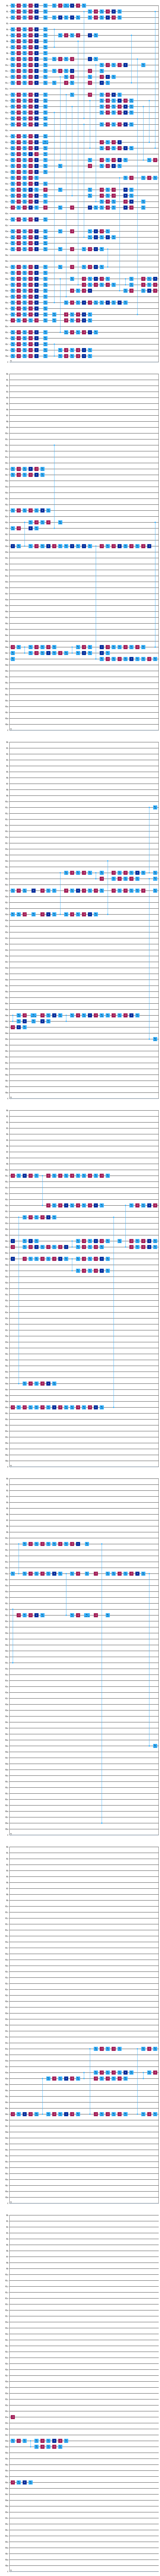

In [618]:
cut_start = 0
cut_number = 1000

qc_red_cut = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_red_cut.append(qc_red.data[q_i], qc_red_cut.qubits, qc_red_cut.clbits)

qc_red_cut.draw('mpl')


In [557]:
from qiskit.qasm2 import dumps
qasm_str = dumps(qc_red)
#print(qasm_str)

In [585]:
gate_num, gate_count, gate_position, double_qubit_gates_number = gates_counting_func(qc_red, [58])

Total number of gates: 7869
Number of gates with qubits in q_num: 66
Gates positions: [437, 438, 439, 440, 441, 442, 825, 826, 827, 828, 829, 830, 837, 1979, 1980, 1981, 1982, 1983, 1984, 1991, 2284, 2285, 2286, 2287, 2288, 2289, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3655, 3656, 3657, 3658, 3659, 3660, 3667, 4043, 4044, 4045, 4046, 4047, 4048, 4625, 4626, 4627, 4628, 4629, 4630, 4637, 5328, 5329, 5330, 5331, 5332, 5333, 5871, 5872, 5873, 5874, 5875, 5876, 7867]
Positions of double gates : [12, 19, 32, 39, 52]


In [586]:
last_double_gate_position = gate_position[double_qubit_gates_number[len(double_qubit_gates_number)-1]]
print('Last double gate position: ' + str(last_double_gate_position))
last_double_gate_poistion_for_qubit = double_qubit_gates_number[len(double_qubit_gates_number)-1]
print('Last double gate position in the list for give qubits: ' + str(last_double_gate_poistion_for_qubit))

Last double gate position: 4637
Last double gate position in the list for give qubits: 52


In [588]:
#Reorder gates to make measurements earlier. Not the full circuit but part with first 6 qubits measurements
counter = 0
for i in range(last_double_gate_poistion_for_qubit + 1, gate_count):
    main_circ_gate_num = gate_position[i]
    #print(main_circ_gate_num)
    insert_position = last_double_gate_position + 1 + counter
    counter = counter + 1
    #print(insert_position)
    inst = qc_red.data[main_circ_gate_num]
    del qc_red.data[main_circ_gate_num]
    qc_red.data.insert(insert_position, inst)

In [593]:
gate_num_reord, gate_count_reord, gate_position_reord, double_qubit_gates_number_reord = gates_counting_func(qc_red, [58])

Total number of gates: 7869
Number of gates with qubits in q_num: 66
Gates positions: [437, 438, 439, 440, 441, 442, 825, 826, 827, 828, 829, 830, 837, 1979, 1980, 1981, 1982, 1983, 1984, 1991, 2284, 2285, 2286, 2287, 2288, 2289, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3655, 3656, 3657, 3658, 3659, 3660, 3667, 4043, 4044, 4045, 4046, 4047, 4048, 4625, 4626, 4627, 4628, 4629, 4630, 4637, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663]
Positions of double gates : [12, 19, 32, 39, 52]


In [594]:
#Saving reordered circuit
qc_full_reordered = QuantumCircuit(60,60)
qc_full_reordered = qc_red

In [607]:
gate_num_reord, gate_count_reord, gate_position_reord, double_qubit_gates_number_reord = gates_counting_func(qc_full_reordered, [58])

Total number of gates: 7869
Number of gates with qubits in q_num: 66
Gates positions: [437, 438, 439, 440, 441, 442, 825, 826, 827, 828, 829, 830, 837, 1979, 1980, 1981, 1982, 1983, 1984, 1991, 2284, 2285, 2286, 2287, 2288, 2289, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3655, 3656, 3657, 3658, 3659, 3660, 3667, 4043, 4044, 4045, 4046, 4047, 4048, 4625, 4626, 4627, 4628, 4629, 4630, 4637, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663]
Positions of double gates : [12, 19, 32, 39, 52]


In [595]:
qc_1_and_2 = QuantumCircuit(60,60)
for i in range(gate_position_reord[len(gate_position_reord)-1]+1):
    qc_1_and_2.append(qc_full_reordered.data[i], qc_1_and_2.qubits, qc_1_and_2.clbits)

In [608]:
gate_num_reord, gate_count_reord, gate_position_reord, double_qubit_gates_number_reord = gates_counting_func(qc_1_and_2, [58])

Total number of gates: 4664
Number of gates with qubits in q_num: 66
Gates positions: [437, 438, 439, 440, 441, 442, 825, 826, 827, 828, 829, 830, 837, 1979, 1980, 1981, 1982, 1983, 1984, 1991, 2284, 2285, 2286, 2287, 2288, 2289, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3655, 3656, 3657, 3658, 3659, 3660, 3667, 4043, 4044, 4045, 4046, 4047, 4048, 4625, 4626, 4627, 4628, 4629, 4630, 4637, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663]
Positions of double gates : [12, 19, 32, 39, 52]


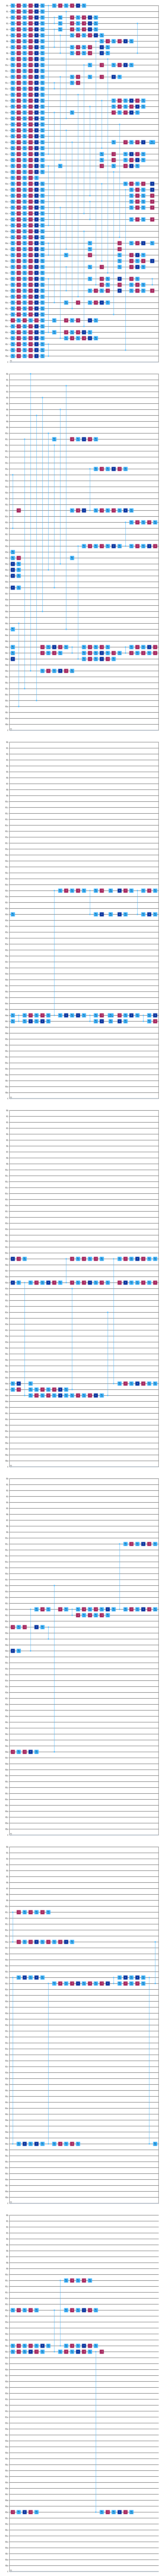

In [606]:
cut_start = 0
cut_number = 1000

qc_1_and_2_cut = QuantumCircuit(60,60)
for q_i in range(cut_start, cut_start + cut_number):
    qc_1_and_2_cut.append(q.data[q_i], qc_1_and_2_cut.qubits, qc_1_and_2_cut.clbits)

qc_1_and_2_cut.draw('mpl')

In [601]:

V = 60
adj = [[] for i in range(V+1)]
for gate in qc_1_and_2.data:
     #print('\ngate name:', gate[0].name)
     bb = gate[1]
     #print('qubit(s) acted on:', bb[0]._index)
     if len(bb) > 1:
        #print('qubit(s) acted on:', bb[1]._index)
        addEdge(bb[0]._index, bb[1]._index)

#for i in range(42):
#    addEdge(i, i)

list_of_conn = []
#for q_n in range(0,1):
q_n = 58
for u in range(q_n,q_n+1):
    for v in range(60):
        if u != v:
            if (isReachable(u, v)):
                print("There is a path from",u,"to",v)
                list_of_conn.append(u)
                list_of_conn.append(v)
            else:
                aa = 1
                print("There is no path from",u,"to",v)
list_of_conn = list(set(list_of_conn))
print(list_of_conn)
print(len(list_of_conn))

There is a path from 58 to 0
There is a path from 58 to 1
There is a path from 58 to 2
There is a path from 58 to 3
There is a path from 58 to 4
There is a path from 58 to 5
There is a path from 58 to 6
There is a path from 58 to 7
There is a path from 58 to 8
There is a path from 58 to 9
There is a path from 58 to 10
There is a path from 58 to 11
There is a path from 58 to 12
There is a path from 58 to 13
There is a path from 58 to 14
There is a path from 58 to 15
There is a path from 58 to 16
There is a path from 58 to 17
There is a path from 58 to 18
There is a path from 58 to 19
There is a path from 58 to 20
There is a path from 58 to 21
There is a path from 58 to 22
There is a path from 58 to 23
There is a path from 58 to 24
There is a path from 58 to 25
There is a path from 58 to 26
There is a path from 58 to 27
There is a path from 58 to 28
There is a path from 58 to 29
There is a path from 58 to 30
There is a path from 58 to 31
There is a path from 58 to 32
There is a path from

In [122]:
import bluequbit
from qiskit.visualization import plot_histogram
bq = bluequbit.init("ifvQUoJTa445RywgR6thzt5D2dCtAezL")
result = bq.run(qc_cut_1, device='gpu')
counts = result.get_counts()

BQ-PYTHON-SDK - WARNING - Beta version 0.8.3b1 of BlueQubit Python SDK is being used.
BQ-PYTHON-SDK - INFO - Submitted: Job ID: GyLN2RonBJoGuGna, device: gpu, run status: PENDING, created on: 2024-10-26 01:19:18 UTC, estimated runtime: 10316 ms, estimated cost: $0.20, num qubits: 36


In [126]:
for dic in counts:
    if counts[dic] > 0.0001:
        ans = dic

print(ans)
print(counts[ans])

010010111000000010100100011000101000
0.00010063559602713212


In [15]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
def gates_counting_func(qc, q_num):
    gate_count = 0
    gate_num = 0
    gate_position = []
    double_qubit_gates_number = []
    for gate in qc.data:
        gg = gate[0]
        bb = gate[1]
        if len(bb) < 2:
            q1 = bb[0]._index
            if q1 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
        else:
            q1 = bb[0]._index
            q2 = bb[1]._index
            if q1 in q_num or q2 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
                double_qubit_gates_number.append(gate_count - 1)
        gate_num = gate_num + 1

    print('Total number of gates: ' + str(gate_num))
    print('Number of gates with qubits in q_num: ' + str(gate_count))
    print('Gates positions: ' + str(gate_position))
    print('Positions of double gates : ' + str(double_qubit_gates_number))
    return gate_num, gate_count, gate_position, double_qubit_gates_number

In [14]:
#counting gates and finding the last gate nuber for a given qubit and finding the last 2-qubit gate
def gates_counting_func_1(qc, q_num):
    gate_count = 0
    gate_num = 0
    gate_position = []
    double_qubit_gates_number = []
    for gate in qc.data:
        gg = gate[0]
        bb = gate[1]
        if len(bb) < 2:
            q1 = bb[0]._index
            if q1 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
        else:
            q1 = bb[0]._index
            q2 = bb[1]._index
            if q1 in q_num or q2 in q_num:
                gate_count = gate_count + 1
                gate_position.append(gate_num)
                double_qubit_gates_number.append(gate_count - 1)
        gate_num = gate_num + 1
    return gate_num, gate_count, gate_position, double_qubit_gates_number

In [13]:
# Python3 program to check if there is exist a path between
# two vertices of an undirected graph.
from collections import deque
def addEdge(v, w):
    global adj
    adj[v].append(w)
    adj[w].append(v)
 
# A BFS based function to check whether d is reachable from s.
def isReachable(s, d):
     
    # Base case
    if (s == d):
        return True
 
    # Mark all the vertices as not visited
    visited = [False for i in range(V)]
 
    # Create a queue for BFS
    queue = deque()
 
    # Mark the current node as visited and enqueue it
    visited[s] = True
    queue.append(s)
 
    while (len(queue) > 0):
       
        # Dequeue a vertex from queue and print
        s = queue.popleft()
        # queue.pop_front()
 
        # Get all adjacent vertices of the dequeued vertex s
        # If a adjacent has not been visited, then mark it
        # visited  and enqueue it
        for i in adj[s]:
 
            # If this adjacent node is the destination node,
            # then return true
            if (i == d):
                return True
 
            # Else, continue to do BFS
            if (not visited[i]):
                visited[i] = True
                queue.append(i)
    # If BFS is complete without visiting d
    return False